# True number of events

In [11]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Importing modules

In [12]:
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt

import scipy.constants as constants
import scipy.stats     as stats
import scipy.optimize  as optimize

import warnings
warnings.filterwarnings('ignore')

In [13]:
# REMEMBER TO ADD Your Fanal FOLDER TO PYTHONPATH
import os
import sys
rootpath = os.getcwd()[:-15]
print('add path to PYTHONPATH : ', rootpath)
sys.path.insert(0, os.path.abspath(rootpath))

add path to PYTHONPATH :  /Users/hernando/work/docencia/master/Fisica_Particulas/USC-Fanal-v2


In [14]:
import core.pltext as pltext
#import hipy.efit   as efit
import core.utils  as ut

import ana.fanal  as fn

pltext.style()

## Indications


### Indications

   * Read the MC-true info of the data and check the number of events in each sample


## True x-check

In [15]:
#dirpath = '/Users/hernando/docencia/master/Fisica_Particulas/USC-Fanal/data/'

In [16]:
import notebooks.guide.collpars as collpars # collaboration specific parameters

coll          = collpars.collaboration
sel_ntracks   = collpars.sel_ntracks
sel_eblob2    = collpars.sel_eblob2
sel_erange    = collpars.sel_erange
sel_eroi      = collpars.sel_eroi

print('Collaboration             : {:s}'.format(coll))
print('number of tracks range    : {:6d}'.format(sel_ntracks))
print('Blob-2 energy range       : {:6.3f}  MeV'.format(sel_eblob2))
print('Energy range              : ({:6.3f}, {:6.3f}) MeV'.format(*sel_erange))
print('Energy RoI range          : ({:6.3f}, {:6.3f}) MeV'.format(*sel_eroi))

Collaboration             : new_beta
number of tracks range    :      1
Blob-2 energy range       :  0.400  MeV
Energy range              : ( 2.400,  2.700) MeV
Energy RoI range          : ( 2.430,  2.480) MeV


In [18]:
filename = "/data/fanal_"+coll+".h5"
print('Data : ', rootpath + filename)

mdata = pd.read_hdf(rootpath + filename, key = 'mc/dummy')


Data :  /Users/hernando/work/docencia/master/Fisica_Particulas/USC-Fanal-v2/data/fanal_new_beta.h5


Total    True events        :  [('bb', 26), ('Bi', 1344), ('Tl', 20693)]
Selected True events in E   :  [('bb', 14), ('Bi', 24), ('Tl', 133)]
Selected True events in Roi :  [('bb', 14), ('Bi', 21), ('Tl', 1)]


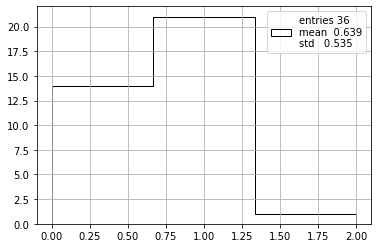

In [21]:

mask1 = (mdata.E >= sel_erange[0]) & (mdata.E < sel_erange[1])
mask2 = mask1 & (mdata.num_tracks <= sel_ntracks)
mask3 = mask2 & (mdata.blob2_E >= sel_eblob2)
mask4 = mask3 & (mdata.E >= sel_eroi[0]) & (mdata.E < sel_eroi[1])

pltext.hist(mdata.mc[mask4], 3);

sample_names = ("bb", "Bi", "Tl")
print('Total    True events        : ', [(sample_names[i], np.sum(mdata.mc == i)) for i in range(3)])
print('Selected True events in E   : ', [(sample_names[i], np.sum(mdata[mask3].mc == i)) for i in range(3)])
print('Selected True events in Roi : ', [(sample_names[i], np.sum(mdata[mask4].mc == i)) for i in range(3)])


